In [52]:
import json
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from collections import Counter
import re

In [53]:
checkin = pd.read_json("/Users/annaywj/Desktop/SDSU/BDA696/yelp_academic_dataset_checkin.json", lines=True)
checkin.head()

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


In [54]:
tip = pd.read_json("/Users/annaywj/Desktop/SDSU/BDA696/yelp_academic_dataset_tip.json", lines = True)
tip.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [55]:
business = pd.read_json("/Users/annaywj/Desktop/SDSU/BDA696/yelp_academic_dataset_business.json", lines=True)
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [56]:
file_path = "/Users/annaywj/Desktop/SDSU/BDA696/yelp_academic_dataset_review.json"

with open(file_path, 'r') as f:
    data = [json.loads(line) for line in f]

review = pd.DataFrame(data)
review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [57]:
file_path = "/Users/annaywj/Desktop/SDSU/BDA696/yelp_academic_dataset_user.json"

with open(file_path, 'r') as f:
    data = [json.loads(line) for line in f]

user = pd.DataFrame(data)
user.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [58]:
# Cleaning the Business Dataset
print("\nCleaning Business Dataset:")
print(business.info())

business['categories'] = business['categories'].fillna('').astype(str)
business['address'] = business['address'].fillna('').str.lower()
business['city'] = business['city'].fillna('').str.lower()
business['state'] = business['state'].fillna('').str.upper()
business['hours'] = business['hours'].fillna('{}')
business['attributes'] = business['attributes'].fillna('{}')
business = business.dropna(subset=['latitude', 'longitude'])

print("\nCleaned Business Dataset:")
print(business.info())

# Cleaning the Review Dataset
print("\nCleaning Review Dataset:")
print(review.info())

review['text'] = review['text'].fillna('').str.lower()
review['date'] = pd.to_datetime(review['date'])
review = review.dropna(subset=['business_id', 'stars'])

print("\nCleaned Review Dataset:")
print(review.info())

# Cleaning the Checkin Dataset
print("\nCleaning Checkin Dataset:")
print(checkin.info())

checkin['date'] = checkin['date'].fillna('')
checkin = checkin.dropna(subset=['business_id'])

print("\nCleaned Checkin Dataset:")
print(checkin.info())

# Cleaning the Tip Dataset
print("\nCleaning Tip Dataset:")
print(tip.info())

tip['text'] = tip['text'].fillna('').str.lower()
tip['date'] = pd.to_datetime(tip['date'])
tip = tip.dropna(subset=['business_id', 'user_id'])

print("\nCleaned Tip Dataset:")
print(tip.info())

# Cleaning the User Dataset
print("\nCleaning User Dataset:")
print(user.info())

user['friends'] = user['friends'].fillna('').astype(str)
user['elite'] = user['elite'].fillna('').astype(str)
user['yelping_since'] = pd.to_datetime(user['yelping_since'])
user = user.fillna(0)

print("\nCleaned User Dataset:")
print(user.info())


Cleaning Business Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB
None

Cleaned Business Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entri

In [59]:
from collections import Counter

In [60]:
restaurant_phrases = [
    'Food', 'Restaurant', 'Cafe', 'Bar', 'Pizza', 'Fast Food', 'Bakery', 
    'Seafood', 'American', 'Chinese', 'Italian', 'Mexican', 'Breakfast', 
    'Brunch', 'Sushi', 'Steakhouse', 'Indian', 'Thai', 'Burgers', 
    'Sandwich', 'Canadian', 'American (Traditional)', 'Canadian (New)', 
    'American (New)', 'Breakfast & Brunch', 'Korean'
]


In [61]:
import re

In [62]:
def extract_keywords(categories, phrases):
    if categories is None or pd.isna(categories):  # Handle missing values
        return []
    if isinstance(categories, str):  # If it's a string, split it into a list
        categories = categories.split(', ')
    elif not isinstance(categories, list):  # If it's neither a list nor a string
        return []
    
    # Extract matching phrases
    matches = []
    for phrase in phrases:
        # Case-insensitive substring matching
        matches.extend([cat for cat in categories if re.search(rf'\b{re.escape(phrase)}\b', cat, re.IGNORECASE)])
    return matches

In [63]:
def preprocess_categories(categories):
    if pd.isna(categories):  # Handle NaN values
        return []
    if isinstance(categories, str):  # If it's a string, split into a list
        return categories.split(', ')
    elif isinstance(categories, list):  # If it's already a list, return as is
        return categories
    else:  # Handle unexpected data types
        return []

In [64]:
print(business['categories'].apply(type).value_counts())


categories
<class 'str'>    150346
Name: count, dtype: int64


In [65]:
def preprocess_categories(categories):
    if isinstance(categories, list):  # If it's already a list, return as is
        return categories
    elif isinstance(categories, str):  # If it's a string, split into a list
        return categories.split(', ')
    elif pd.isna(categories):  # Handle NaN values
        return []
    else:  # Unexpected data types
        print(f"Unexpected data type: {type(categories)} - {categories}")
        return []

# Apply preprocessing and debug unexpected types
try:
    business['categories'] = business['categories'].apply(preprocess_categories)
    print("Preprocessing completed successfully.")
except Exception as e:
    print(f"Error during preprocessing: {e}")

# Verify the column after preprocessing
print(business['categories'].head(10))


Preprocessing completed successfully.
0    [Doctors, Traditional Chinese Medicine, Naturo...
1    [Shipping Centers, Local Services, Notaries, M...
2    [Department Stores, Shopping, Fashion, Home & ...
3    [Restaurants, Food, Bubble Tea, Coffee & Tea, ...
4                          [Brewpubs, Breweries, Food]
5    [Burgers, Fast Food, Sandwiches, Food, Ice Cre...
6    [Sporting Goods, Fashion, Shoe Stores, Shoppin...
7                [Synagogues, Religious Organizations]
8    [Pubs, Restaurants, Italian, Bars, American (T...
9    [Ice Cream & Frozen Yogurt, Fast Food, Burgers...
Name: categories, dtype: object


In [66]:
def extract_keywords(categories, phrases):
    matches = []
    for phrase in phrases:
        # Use case-insensitive matching with regex
        matches.extend([cat for cat in categories if re.search(rf'\b{re.escape(phrase)}\b', cat, re.IGNORECASE)])
    return matches


In [67]:
business['restaurant_keywords'] = business['categories'].apply(lambda x: extract_keywords(x, restaurant_phrases))

In [68]:
def count_keywords(df):
    keyword_counter = Counter()
    for keywords in df['restaurant_keywords']:
        keyword_counter.update(keywords)
    return pd.DataFrame(keyword_counter.items(), columns=['Keyword', 'Frequency']).sort_values(by='Frequency', ascending=False)

In [69]:
us_states = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 
    'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 
    'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 
    'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 
    'WV', 'WI', 'WY'
]

canadian_provinces = [
    'AB', 'BC', 'LB', 'MB', 'NB', 'NF', 'NS', 'NU', 'NW', 'ON', 'PE', 'QC', 
    'SK', 'YU'
]

# Derive the `country` column
def assign_country(state):
    if state in us_states:
        return 'USA'
    elif state in canadian_provinces:
        return 'Canada'
    return 'Other'  # For states not listed

business['country'] = business['state'].apply(assign_country)

usa_businesses = business[business['country'] == 'USA']
canada_businesses = business[business['country'] == 'Canada']

# Count keywords for USA and Canada
usa_keyword_counts = count_keywords(usa_businesses)
canada_keyword_counts = count_keywords(canada_businesses)

# Display results
print("Top Restaurant Keywords in USA:")
print(usa_keyword_counts.head(10))

print("\nTop Restaurant Keywords in Canada:")
print(canada_keyword_counts.head(10))

Top Restaurant Keywords in USA:
                   Keyword  Frequency
1                     Food      26572
7       Breakfast & Brunch      18072
2                Fast Food      12302
4   American (Traditional)       7945
11                   Pizza       6780
14          American (New)       5990
3                  Burgers       5394
16                 Mexican       4542
5                  Italian       4395
12          Specialty Food       4039

Top Restaurant Keywords in Canada:
                   Keyword  Frequency
0                     Food       1208
11               Fast Food        642
16      Breakfast & Brunch        642
2                    Pizza        313
14          Canadian (New)        261
5                  Burgers        242
4                  Chinese        202
1           Specialty Food        194
15  American (Traditional)        194
3                  Italian        178


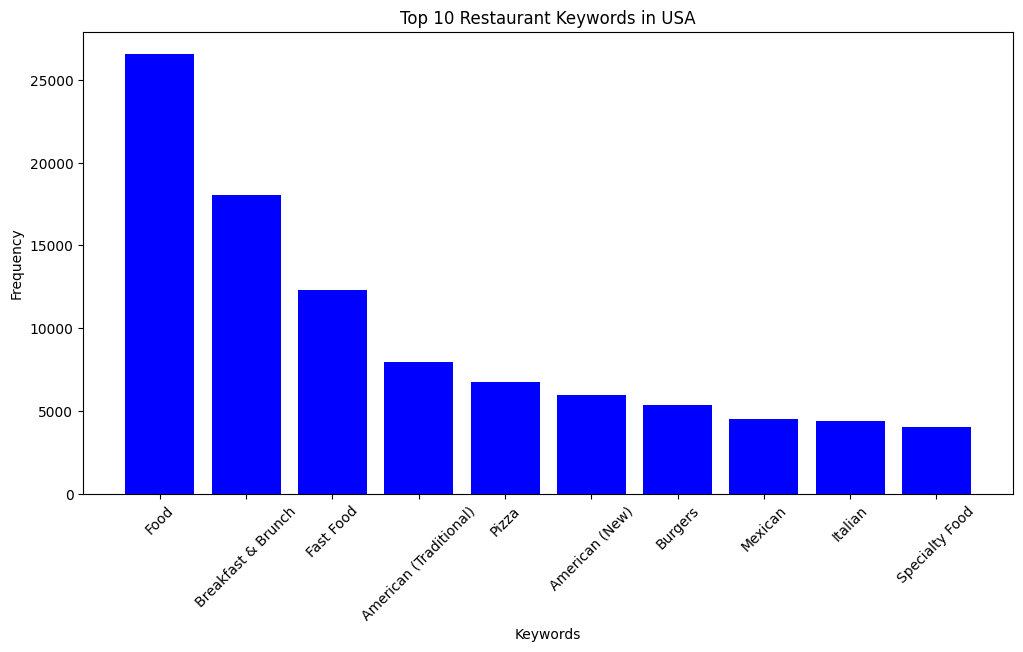

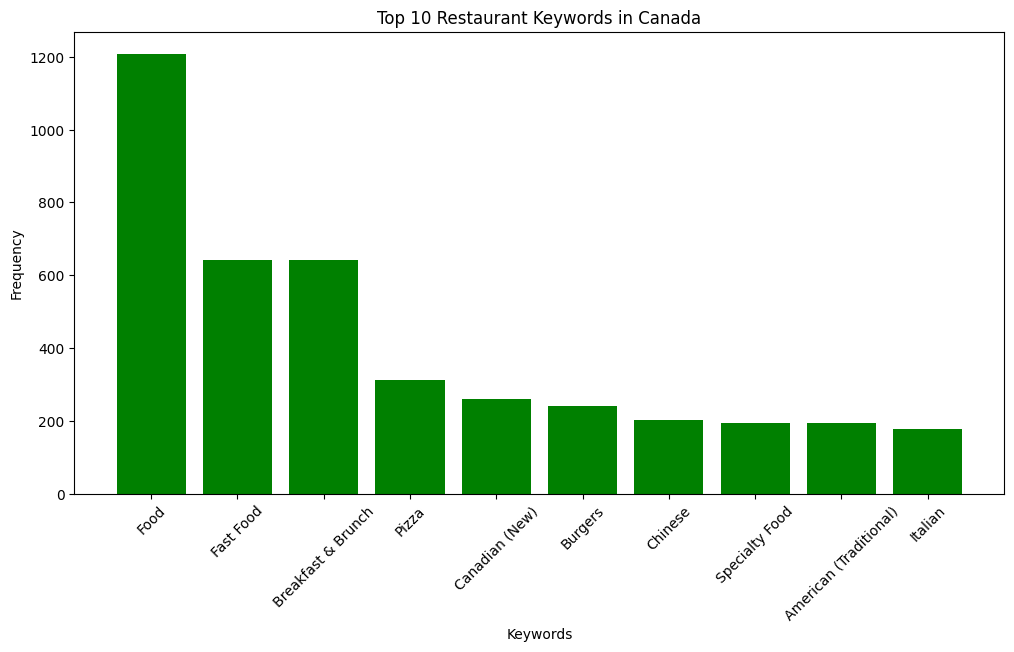

In [70]:
# Plot USA keyword frequencies
plt.figure(figsize=(12, 6))
plt.bar(usa_keyword_counts['Keyword'][:10], usa_keyword_counts['Frequency'][:10], color='blue')
plt.title('Top 10 Restaurant Keywords in USA')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Plot Canada keyword frequencies
plt.figure(figsize=(12, 6))
plt.bar(canada_keyword_counts['Keyword'][:10], canada_keyword_counts['Frequency'][:10], color='green')
plt.title('Top 10 Restaurant Keywords in Canada')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Clustering and Geographical Analysis

In [71]:
selected_categories = ['Breakfast & Brunch', 'Pizza', 'Specialty Food']
filtered_businesses = business[business['restaurant_keywords'].apply(
    lambda x: any(keyword in selected_categories for keyword in x)
)]

In [72]:
geo_data = filtered_businesses[['latitude', 'longitude', 'stars', 'review_count']].dropna()
scaler = StandardScaler()
geo_data_scaled = scaler.fit_transform(geo_data)

In [73]:
kmeans = KMeans(n_clusters=5, random_state=42)
geo_data['kmeans_cluster'] = kmeans.fit_predict(geo_data_scaled)

dbscan = DBSCAN(eps=0.5, min_samples=10)
geo_data['dbscan_cluster'] = dbscan.fit_predict(geo_data_scaled)

In [74]:
cluster_summary = geo_data.groupby('kmeans_cluster').agg({
    'stars': ['mean', 'count'],
    'review_count': ['mean', 'sum']
}).reset_index()

cluster_summary.columns = ['Cluster', 'Avg_Stars', 'Count', 'Avg_Reviews', 'Total_Reviews']

print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
   Cluster  Avg_Stars  Count  Avg_Reviews  Total_Reviews
0        0   3.582370    692    25.760116          17826
1        1   3.645419   3875    82.125419         318236
2        2   4.130282    142  1677.492958         238204
3        3   3.521644  10234    66.382353         679357
4        4   3.653754   2091   109.910569         229823


### K-Means

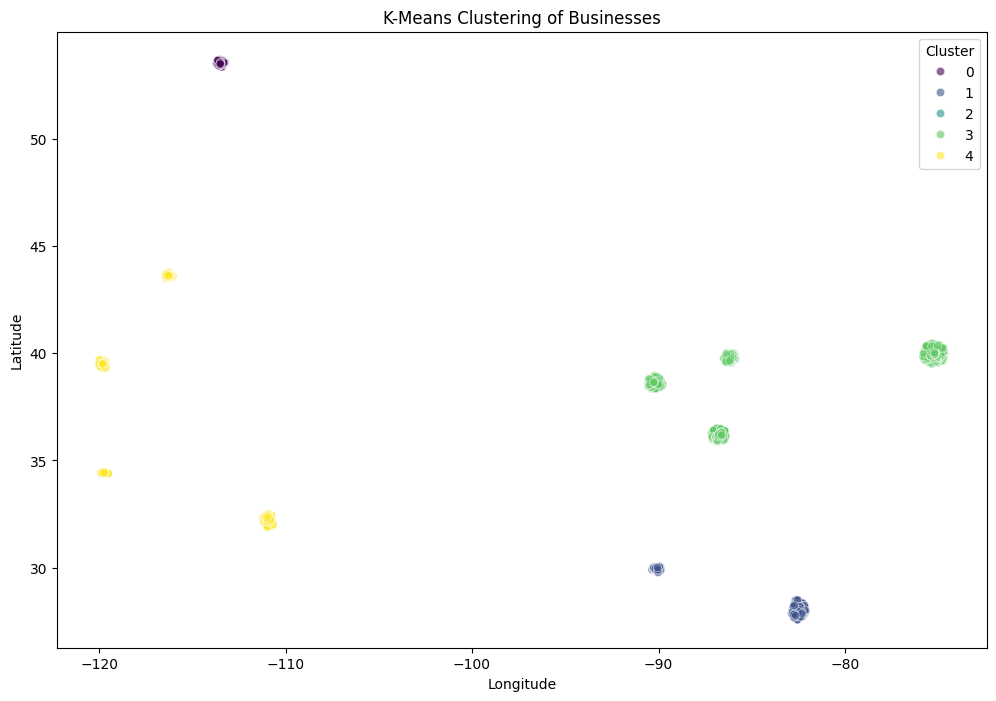

In [75]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='longitude', 
    y='latitude', 
    hue='kmeans_cluster', 
    data=geo_data, 
    palette='viridis', 
    alpha=0.6
)
plt.title('K-Means Clustering of Businesses')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster', loc='upper right')
plt.show()

### DBSCAN

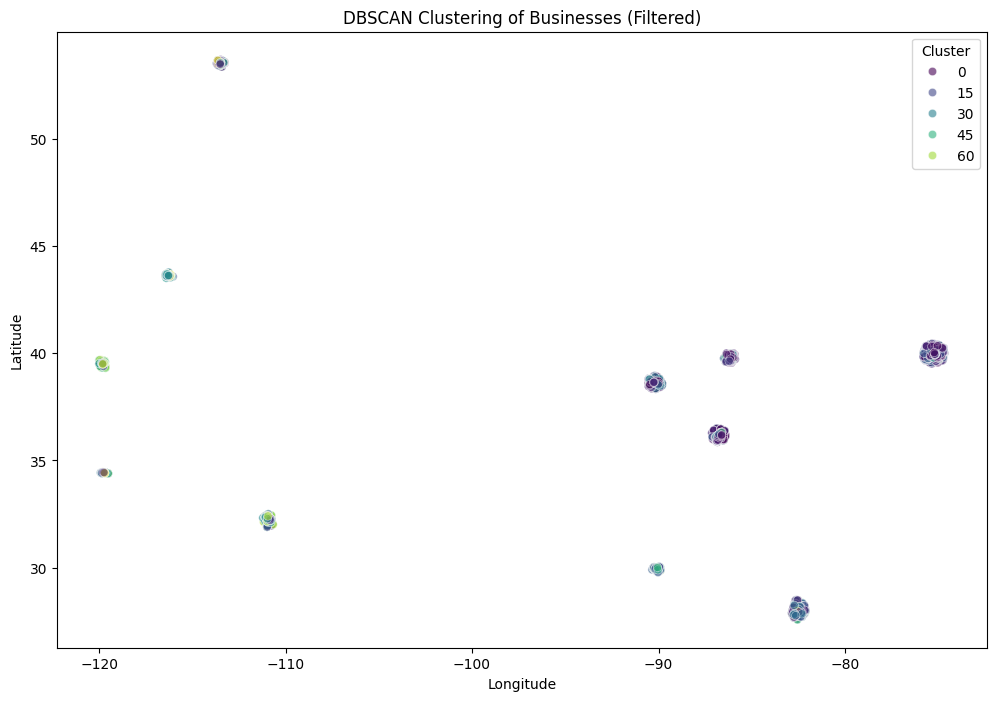

In [76]:
plt.figure(figsize=(12, 8))
dbscan_filtered = geo_data[geo_data['dbscan_cluster'] != -1]  # Exclude noise
sns.scatterplot(
    x='longitude', 
    y='latitude', 
    hue='dbscan_cluster', 
    data=dbscan_filtered, 
    palette='viridis', 
    alpha=0.6
)
plt.title('DBSCAN Clustering of Businesses (Filtered)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster', loc='upper right')
plt.show()

In [95]:
us_states = [
    {'State': 'Alabama', 'Latitude': 32.806671, 'Longitude': -86.791130},
    {'State': 'Alaska', 'Latitude': 61.370716, 'Longitude': -152.404419},
    {'State': 'Arizona', 'Latitude': 33.729759, 'Longitude': -111.431221},
    {'State': 'Arkansas', 'Latitude': 34.969704, 'Longitude': -92.373123},
    {'State': 'California', 'Latitude': 36.116203, 'Longitude': -119.681564},
    {'State': 'Colorado', 'Latitude': 39.059811, 'Longitude': -105.311104},
    {'State': 'Connecticut', 'Latitude': 41.597782, 'Longitude': -72.755371},
    {'State': 'Delaware', 'Latitude': 39.318523, 'Longitude': -75.507141},
    {'State': 'Florida', 'Latitude': 27.766279, 'Longitude': -81.686783},
    {'State': 'Georgia', 'Latitude': 33.040619, 'Longitude': -83.643074},
    {'State': 'Hawaii', 'Latitude': 21.094318, 'Longitude': -157.498337},
    {'State': 'Idaho', 'Latitude': 44.240459, 'Longitude': -114.478828},
    {'State': 'Illinois', 'Latitude': 40.349457, 'Longitude': -88.986137},
    {'State': 'Indiana', 'Latitude': 39.849426, 'Longitude': -86.258278},
    {'State': 'Iowa', 'Latitude': 42.011539, 'Longitude': -93.210526},
    {'State': 'Kansas', 'Latitude': 38.526600, 'Longitude': -96.726486},
    {'State': 'Kentucky', 'Latitude': 37.668140, 'Longitude': -84.670067},
    {'State': 'Louisiana', 'Latitude': 31.169546, 'Longitude': -91.867805},
    {'State': 'Maine', 'Latitude': 44.693947, 'Longitude': -69.381927},
    {'State': 'Maryland', 'Latitude': 39.063946, 'Longitude': -76.802101},
    {'State': 'Massachusetts', 'Latitude': 42.230171, 'Longitude': -71.530106},
    {'State': 'Michigan', 'Latitude': 43.326618, 'Longitude': -84.536095},
    {'State': 'Minnesota', 'Latitude': 45.694454, 'Longitude': -93.900192},
    {'State': 'Mississippi', 'Latitude': 32.741646, 'Longitude': -89.678696},
    {'State': 'Missouri', 'Latitude': 38.456085, 'Longitude': -92.288368},
    {'State': 'Montana', 'Latitude': 46.921925, 'Longitude': -110.454353},
    {'State': 'Nebraska', 'Latitude': 41.125370, 'Longitude': -98.268082},
    {'State': 'Nevada', 'Latitude': 38.313515, 'Longitude': -117.055374},
    {'State': 'New Hampshire', 'Latitude': 43.452492, 'Longitude': -71.563896},
    {'State': 'New Jersey', 'Latitude': 40.298904, 'Longitude': -74.521011},
    {'State': 'New Mexico', 'Latitude': 34.840515, 'Longitude': -106.248482},
    {'State': 'New York', 'Latitude': 42.165726, 'Longitude': -74.948051},
    {'State': 'North Carolina', 'Latitude': 35.630066, 'Longitude': -79.806419},
    {'State': 'North Dakota', 'Latitude': 47.528912, 'Longitude': -99.784012},
    {'State': 'Ohio', 'Latitude': 40.388783, 'Longitude': -82.764915},
    {'State': 'Oklahoma', 'Latitude': 35.565342, 'Longitude': -96.928917},
    {'State': 'Oregon', 'Latitude': 44.572021, 'Longitude': -122.070938},
    {'State': 'Pennsylvania', 'Latitude': 40.590752, 'Longitude': -77.209755},
    {'State': 'Rhode Island', 'Latitude': 41.680893, 'Longitude': -71.511780},
    {'State': 'South Carolina', 'Latitude': 33.856892, 'Longitude': -80.945007},
    {'State': 'South Dakota', 'Latitude': 44.299782, 'Longitude': -99.438828},
    {'State': 'Tennessee', 'Latitude': 35.747845, 'Longitude': -86.692345},
    {'State': 'Texas', 'Latitude': 31.054487, 'Longitude': -97.563461},
    {'State': 'Utah', 'Latitude': 40.150032, 'Longitude': -111.862434},
    {'State': 'Vermont', 'Latitude': 44.045876, 'Longitude': -72.710686},
    {'State': 'Virginia', 'Latitude': 37.769337, 'Longitude': -78.169968},
    {'State': 'Washington', 'Latitude': 47.400902, 'Longitude': -121.490494},
    {'State': 'West Virginia', 'Latitude': 38.491226, 'Longitude': -80.954453},
    {'State': 'Wisconsin', 'Latitude': 44.268543, 'Longitude': -89.616508},
    {'State': 'Wyoming', 'Latitude': 42.755966, 'Longitude': -107.302490}
]


In [96]:
canadian_provinces = [
    {'Province': 'Alberta', 'Latitude': 55.000000, 'Longitude': -115.000000},
    {'Province': 'British Columbia', 'Latitude': 53.726669, 'Longitude': -127.647621},
    {'Province': 'Manitoba', 'Latitude': 56.415211, 'Longitude': -98.739075},
    {'Province': 'Newfoundland and Labrador', 'Latitude': 53.135509, 'Longitude': -57.660435},
    {'Province': 'New Brunswick', 'Latitude': 46.498390, 'Longitude': -66.159668},
    {'Province': 'Nova Scotia', 'Latitude': 45.000000, 'Longitude': -63.000000},
    {'Province': 'Ontario', 'Latitude': 50.000000, 'Longitude': -85.000000},
    {'Province': 'Prince Edward Island', 'Latitude': 46.250000, 'Longitude': -63.000000},
    {'Province': 'Quebec', 'Latitude': 53.000000, 'Longitude': -70.000000},
    {'Province': 'Saskatchewan', 'Latitude': 55.000000, 'Longitude': -106.000000}
]

In [97]:
us_df = pd.DataFrame(us_states)
canada_df = pd.DataFrame(canadian_provinces)

regions_df = pd.concat([
    us_df.rename(columns={'State': 'Region'}),
    canada_df.rename(columns={'Province': 'Region'})
]).reset_index(drop=True)

# Find the closest region by latitude and longitude
def find_closest_region(lat, lon):
    regions_df['Distance'] = ((regions_df['Latitude'] - lat) ** 2 + (regions_df['Longitude'] - lon) ** 2) ** 0.5
    closest_region = regions_df.loc[regions_df['Distance'].idxmin()]
    return closest_region['Region']

high_performance_clusters['Likely Area'] = high_performance_clusters.apply(
    lambda row: find_closest_region(row['Avg_Latitude'], row['Avg_Longitude']), axis=1
)

high_performance_clusters


,Cluster,Avg_Latitude,Avg_Longitude,Avg_Stars,Count,Avg_Reviews,Total_Reviews,Likely Area
2,2,34.154083,-88.477705,4.130282,142,1677.492958,238204,Mississippi
4,4,36.816701,-115.939804,3.653754,2091,109.910569,229823,Nevada
1,1,28.544331,-84.711082,3.645419,3875,82.125419,318236,Florida
0,0,53.534429,-113.505207,3.582370,692,25.760116,17826,Alberta
3,3,39.276386,-80.556377,3.521644,10234,66.382353,679357,West Virginia


In [104]:
cities_data = pd.DataFrame([
    # Alberta
    {'City': 'Calgary', 'Latitude': 51.049999, 'Longitude': -114.066666, 'Region': 'Alberta'},
    {'City': 'Edmonton', 'Latitude': 53.631611, 'Longitude': -113.323975, 'Region': 'Alberta'},
    {'City': 'Red Deer', 'Latitude': 52.268111, 'Longitude': -113.811238, 'Region': 'Alberta'},
    {'City': 'Lethbridge', 'Latitude': 49.693491, 'Longitude': -112.841844, 'Region': 'Alberta'},
    {'City': 'St. Albert', 'Latitude': 53.630475, 'Longitude': -113.625642, 'Region': 'Alberta'},
    {'City': 'Grande Prairie', 'Latitude': 55.170833, 'Longitude': -118.794722, 'Region': 'Alberta'},
    {'City': 'Airdrie', 'Latitude': 51.2917, 'Longitude': -114.0144, 'Region': 'Alberta'},
    {'City': 'Medicine Hat', 'Latitude': 50.041667, 'Longitude': -110.6775, 'Region': 'Alberta'},
    # Mississippi
    {'City': 'Jackson', 'Latitude': 32.299, 'Longitude': -90.185, 'Region': 'Mississippi'},
    {'City': 'Gulfport', 'Latitude': 30.367, 'Longitude': -89.093, 'Region': 'Mississippi'},
    {'City': 'West Gulfport', 'Latitude': 30.404, 'Longitude': -89.094, 'Region': 'Mississippi'},
    {'City': 'Southaven', 'Latitude': 34.989, 'Longitude': -90.013, 'Region': 'Mississippi'},
    {'City': 'Hattiesburg', 'Latitude': 31.327, 'Longitude': -89.290, 'Region': 'Mississippi'},
    {'City': 'Biloxi', 'Latitude': 30.396, 'Longitude': -88.885, 'Region': 'Mississippi'},
    {'City': 'Meridian', 'Latitude': 32.364, 'Longitude': -88.704, 'Region': 'Mississippi'},
    {'City': 'Olive Branch', 'Latitude': 34.962, 'Longitude': -89.830, 'Region': 'Mississippi'},
    {'City': 'Tupelo', 'Latitude': 34.258, 'Longitude': -88.705, 'Region': 'Mississippi'},
    {'City': 'Greenville', 'Latitude': 33.409, 'Longitude': -91.060, 'Region': 'Mississippi'},
    # Florida
    {'City': 'Jacksonville', 'Latitude': 30.332, 'Longitude': -81.656, 'Region': 'Florida'},
    {'City': 'Miami', 'Latitude': 25.774, 'Longitude': -80.194, 'Region': 'Florida'},
    {'City': 'Tampa', 'Latitude': 27.948, 'Longitude': -82.458, 'Region': 'Florida'},
    {'City': 'Orlando', 'Latitude': 28.538, 'Longitude': -81.379, 'Region': 'Florida'},
    {'City': 'St. Petersburg', 'Latitude': 27.771, 'Longitude': -82.679, 'Region': 'Florida'},
    {'City': 'Hialeah', 'Latitude': 25.858, 'Longitude': -80.278, 'Region': 'Florida'},
    {'City': 'Tallahassee', 'Latitude': 30.438, 'Longitude': -84.281, 'Region': 'Florida'},
    {'City': 'Fort Lauderdale', 'Latitude': 26.122, 'Longitude': -80.143, 'Region': 'Florida'},
    {'City': 'Cape Coral', 'Latitude': 26.563, 'Longitude': -81.950, 'Region': 'Florida'},
    {'City': 'Pembroke Pines', 'Latitude': 26.003, 'Longitude': -80.224, 'Region': 'Florida'},
    {'City': 'Port Saint Lucie', 'Latitude': 27.294, 'Longitude': -80.350, 'Region': 'Florida'},
    {'City': 'Hollywood', 'Latitude': 26.011, 'Longitude': -80.149, 'Region': 'Florida'},
    # Nevada
    {'City': 'Las Vegas', 'Latitude': 36.175, 'Longitude': -115.137, 'Region': 'Nevada'},
    {'City': 'Henderson', 'Latitude': 36.04, 'Longitude': -114.982, 'Region': 'Nevada'},
    {'City': 'Reno', 'Latitude': 39.53, 'Longitude': -119.814, 'Region': 'Nevada'},
    # West Virginia
    {'City': 'Charleston', 'Latitude': 38.349, 'Longitude': -81.633, 'Region': 'West Virginia'},
    {'City': 'Huntington', 'Latitude': 38.419, 'Longitude': -82.445, 'Region': 'West Virginia'},
    {'City': 'Morgantown', 'Latitude': 39.629, 'Longitude': -79.955, 'Region': 'West Virginia'},
    {'City': 'Parkersburg', 'Latitude': 39.266, 'Longitude': -81.561, 'Region': 'West Virginia'},
    {'City': 'Wheeling', 'Latitude': 40.064, 'Longitude': -80.720, 'Region': 'West Virginia'},
    {'City': 'Weirton', 'Latitude': 40.418, 'Longitude': -80.589, 'Region': 'West Virginia'},
    {'City': 'Fairmont', 'Latitude': 39.486, 'Longitude': -80.143, 'Region': 'West Virginia'},
    {'City': 'Martinsburg', 'Latitude': 39.456, 'Longitude': -77.963, 'Region': 'West Virginia'},
    {'City': 'Beckley', 'Latitude': 37.778, 'Longitude': -81.188, 'Region': 'West Virginia'},
    {'City': 'Clarksburg', 'Latitude': 39.280, 'Longitude': -80.344, 'Region': 'West Virginia'},
    {'City': 'South Charleston', 'Latitude': 38.368, 'Longitude': -81.698, 'Region': 'West Virginia'},
    {'City': 'Vienna', 'Latitude': 39.324, 'Longitude': -81.548, 'Region': 'West Virginia'},
])


In [105]:
# High-performing clusters
high_performance_clusters = pd.DataFrame([
    {'Cluster': 2, 'Avg_Latitude': 34.154083, 'Avg_Longitude': -88.477705, 'Avg_Stars': 4.13, 'Count': 142, 'Avg_Reviews': 1677.49, 'Total_Reviews': 238204},
    {'Cluster': 4, 'Avg_Latitude': 36.816701, 'Avg_Longitude': -115.939804, 'Avg_Stars': 3.65, 'Count': 2091, 'Avg_Reviews': 109.91, 'Total_Reviews': 229823},
    {'Cluster': 1, 'Avg_Latitude': 28.544331, 'Avg_Longitude': -84.711082, 'Avg_Stars': 3.65, 'Count': 3875, 'Avg_Reviews': 82.13, 'Total_Reviews': 318236},
    {'Cluster': 0, 'Avg_Latitude': 53.534429, 'Avg_Longitude': -113.505207, 'Avg_Stars': 3.58, 'Count': 692, 'Avg_Reviews': 25.76, 'Total_Reviews': 17826},
    {'Cluster': 3, 'Avg_Latitude': 39.276386, 'Avg_Longitude': -80.556377, 'Avg_Stars': 3.52, 'Count': 10234, 'Avg_Reviews': 66.38, 'Total_Reviews': 679357},
])

# Find the closest region
def find_closest_region(lat, lon):
    regions_df['Distance'] = ((regions_df['Latitude'] - lat) ** 2 + (regions_df['Longitude'] - lon) ** 2) ** 0.5
    closest_region = regions_df.loc[regions_df['Distance'].idxmin()]
    return closest_region['Region']

# Find the closest city
def find_closest_city(lat, lon):
    cities_data['Distance'] = ((cities_data['Latitude'] - lat) ** 2 + (cities_data['Longitude'] - lon) ** 2) ** 0.5
    closest_city = cities_data.loc[cities_data['Distance'].idxmin()]
    return closest_city['City']

# Apply functions to find closest region and city
high_performance_clusters['Likely Area'] = high_performance_clusters.apply(
    lambda row: find_closest_region(row['Avg_Latitude'], row['Avg_Longitude']), axis=1
)

high_performance_clusters['Likely City'] = high_performance_clusters.apply(
    lambda row: find_closest_city(row['Avg_Latitude'], row['Avg_Longitude']), axis=1
)

high_performance_clusters


,Cluster,Avg_Latitude,Avg_Longitude,Avg_Stars,Count,Avg_Reviews,Total_Reviews,Likely Area,Likely City
0,2,34.154083,-88.477705,4.13,142,1677.49,238204,Mississippi,Tupelo
1,4,36.816701,-115.939804,3.65,2091,109.91,229823,Nevada,Las Vegas
2,1,28.544331,-84.711082,3.65,3875,82.13,318236,Florida,Tallahassee
3,0,53.534429,-113.505207,3.58,692,25.76,17826,Alberta,St. Albert
4,3,39.276386,-80.556377,3.52,10234,66.38,679357,West Virginia,Clarksburg


In [108]:
selected_categories = ['Breakfast & Brunch', 'Pizza', 'Specialty Food']

# Filter for Canadian provinces only
canadian_businesses = business[business['state'].isin(['AB', 'BC', 'LB', 'MB', 'NB', 'NF', 'NS', 'NU', 'NW', 'ON', 'PE', 'QC', 'SK', 'YU'])]

# Count occurrences of selected categories for each province
def category_distribution_by_province(df, categories):
    province_counts = {province: 0 for province in df['state'].unique()}
    
    for _, row in df.iterrows():
        if any(cat in row['restaurant_keywords'] for cat in categories):
            province_counts[row['state']] += 1
    
    return province_counts

distribution = category_distribution_by_province(canadian_businesses, selected_categories)
distribution

{'AB': 692}